In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from string import punctuation
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import nltk
from nltk import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from itertools import chain
import string
import re
from sklearn.metrics import recall_score, f1_score

In [75]:
 df= pd.read_csv('netflixData.csv')

In [76]:
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [77]:
df.rename(columns={'Production Country': 'Production_Country','Release Date':'release_Date','Rating':'ratings','Duration':'duration','Imdb Score':'Imdb_Score','Content Type':'Content_Type','Date Added':'Date_Added'},inplace=True)

In [78]:
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production_Country,release_Date,ratings,duration,Imdb_Score,Content_Type,Date_Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production_Country  5408 non-null   object 
 7   release_Date        5964 non-null   float64
 8   ratings             5963 non-null   object 
 9   duration            5964 non-null   object 
 10  Imdb_Score          5359 non-null   object 
 11  Content_Type        5967 non-null   object 
 12  Date_Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [80]:
df.shape

(5967, 13)

In [81]:
print('The number of rows with Missing Values are: ')
df.isnull().any(axis=1).sum()

The number of rows with Missing Values are: 


2707

In [82]:
df.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production_Country     559
release_Date             3
ratings                  4
duration                 3
Imdb_Score             608
Content_Type             0
Date_Added            1335
dtype: int64

## Removing all the according NULL Values

In [83]:
df = df.dropna(subset=['Cast','Production_Country','release_Date','ratings','duration','Imdb_Score'])

In [84]:
df = df.drop(['Cast','Director','Production_Country'],axis=1) 

In [85]:
df.head()

,Show Id,Title,Description,Genres,release_Date,ratings,duration,Imdb_Score,Content_Type,Date_Added
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...","Horror Movies, International Movies, Thrillers",2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Documentaries, International Movies",2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,TV Comedies,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...","Dramas, International Movies, Romantic Movies",2018.0,TV-G,102 min,7.0/10,Movie,"May 21, 2020"
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,"Dramas, International Movies, Romantic Movies",2020.0,TV-G,104 min,7.0/10,Movie,"June 28, 2020"


## Conversion of the format of Release Date

In [86]:
df["Date"] = pd.to_datetime(df['Date_Added'])
df.head()

,Show Id,Title,Description,Genres,release_Date,ratings,duration,Imdb_Score,Content_Type,Date_Added,Date
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...","Horror Movies, International Movies, Thrillers",2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020",2020-09-08
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Documentaries, International Movies",2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020",2020-07-01
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,TV Comedies,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN,NaT
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...","Dramas, International Movies, Romantic Movies",2018.0,TV-G,102 min,7.0/10,Movie,"May 21, 2020",2020-05-21
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,"Dramas, International Movies, Romantic Movies",2020.0,TV-G,104 min,7.0/10,Movie,"June 28, 2020",2020-06-28


In [87]:
df.duplicated().any()

False

In [88]:
df = df.dropna(subset=['Date'])

In [89]:
df[['Date', 'Title']]

,Date,Title
1,2020-09-08,#Alive
2,2020-07-01,#AnneFrank - Parallel Stories
5,2020-05-21,#FriendButMarried
6,2020-06-28,#FriendButMarried 2
7,2017-09-08,#realityhigh
...,...,...
5957,2021-04-15,Zoot Suit
5958,2020-10-19,Zozo
5960,2020-10-31,Zumbo's Just Desserts
5962,2020-04-25,الف مبروك


In [90]:
# Allocating the corresponding earliest release of the movies. 
(df['release_Date'].min())

1954.0

In [91]:
#Date dataset specifically the “Date” column in utilisjng [ sort_values() ]
#function from the earliest to lastest release dates.

df.sort_values(by='Date')

,Show Id,Title,Description,Genres,release_Date,ratings,duration,Imdb_Score,Content_Type,Date_Added,Date
5411,b6aafb23-24a2-4328-b85e-62795a7beccf,To and From New York,"While covering a story in New York City, a Sea...","Dramas, Independent Movies, Thrillers",2006.0,TV-MA,81 min,5.5/10,Movie,"January 1, 2008",2008-01-01
2440,10a9b02d-3d83-4ed2-bf98-882553f9761a,Just Another Love Story,When he causes a car accident that leaves a yo...,"Dramas, International Movies",2007.0,TV-MA,104 min,7.1/10,Movie,"May 5, 2009",2009-05-05
4382,dd9b360f-f7b1-401b-8d3a-374692aed35c,Splatter,"After committing suicide, a washed-up rocker r...",Horror Movies,2009.0,TV-MA,29 min,2.9/10,Movie,"November 18, 2009",2009-11-18
1526,5ff9c289-5579-40af-937b-bbe81b229851,Even the Rain,While making a film about the incursion of Chr...,"Dramas, International Movies",2010.0,TV-MA,103 min,7.3/10,Movie,"May 17, 2011",2011-05-17
2417,434ed003-d3f5-418c-8892-fc79318fa506,Joseph: King of Dreams,With his gift of dream interpretation and his ...,"Children & Family Movies, Dramas, Faith & Spir...",2000.0,TV-PG,75 min,6.6/10,Movie,"September 27, 2011",2011-09-27
...,...,...,...,...,...,...,...,...,...,...,...
5260,6308483e-8d7b-4a8c-b638-fb0674f45a65,The Twilight Saga: Breaking Dawn: Part 1,"After a dream wedding, Bella and Edward enter ...","Dramas, Romantic Movies",2011.0,PG-13,117 min,5.1/10,Movie,"July 16, 2021",2021-07-16
5262,4cd1dfaa-c764-47be-9c8b-9d0e81931f79,The Twilight Saga: Eclipse,With a bloodthirsty enemy on a quest for reven...,"Dramas, Romantic Movies",2010.0,PG-13,124 min,4.8/10,Movie,"July 16, 2021",2021-07-16
5261,7efc182f-5620-4a21-95a8-fd2012db6cf5,The Twilight Saga: Breaking Dawn: Part 2,"In the epic series' final chapter, Bella and E...","Dramas, Romantic Movies",2012.0,PG-13,115 min,5.6/10,Movie,"July 16, 2021",2021-07-16
5263,b171737a-446a-40cc-bc49-2a651ac335be,The Twilight Saga: New Moon,Still reeling from the departure of vampire Ed...,"Dramas, Romantic Movies",2009.0,PG-13,131 min,4.8/10,Movie,"July 16, 2021",2021-07-16


In [92]:
# Create bins for each decade through 
bins = [ 1980, 1990, 2000, 2010, 2020, 2030]
names = [ '1980s', '1990s', '2000s', '2010s','2020s']

# Create decade column 
df['decade'] = pd.cut(df['release_Date'], bins, labels=names)

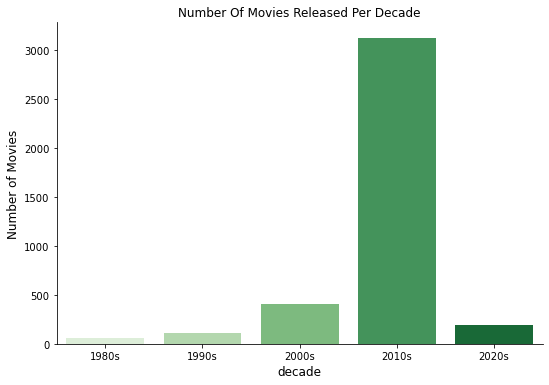

In [93]:
# Plot number of movies released per decade
# Use Seaborn kind = 'count' to do the counting.
sns.catplot(x = 'decade', kind = 'count', palette = 'Greens', data = df, aspect = 1.5)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('decade', fontsize=12)
plt.title('Number Of Movies Released Per Decade', fontsize = 12)
plt.show()


	**Diagrammatic representation[: Histogram showcasing the following Number of the Movies Release/Produced throughout the six respectable decades from the 1980s -2020s.** 

	**From the representation above, there is expeditious increase in the production from the 2000s whereby (< 100) official production of movie were generated to 2010s yielding  (> 3500) official movie production were generated respectively. This therefore emphasis that there is excessive demand for movie production throughout the following decades, denoting (80.0%) increase for production and ongoing from the public.It must be noted the acceerating demand in viewreship respectively from early 1970s towards 2000s , noticeably gradual increase i viewership and exponentially spike in 2010 and onwards**



	**From the beginning of year 2020, there weren’t as much productivity of movie releases due to detrimental issue/factors [COVID Restrictions] which hindered its progressive activity for movie release.**

In [94]:
def clean_Data_Ex1(text):
    
    text = text.lower()
    # Generate lowercase text
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    return text

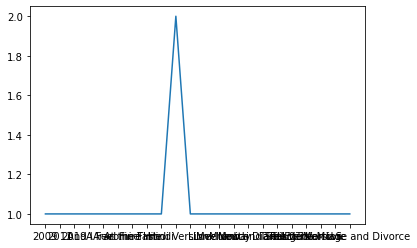

Max No.of Movies Relesed = 606
Date_Added = 2018.0


count     62.000000
mean      63.596774
std      140.695749
min        1.000000
25%        2.250000
50%        8.500000
75%       37.000000
max      606.000000
Name: Title, dtype: float64

In [95]:
##4. Descriptive Analytics and Visualization
##[Release Date implementation; Year]
# Determine out which Year has the highest number of Movie releases

#Ploting a Graph with No.of Movies each Year corresponding to its Year

df['Date_Added'] = df['Title'].str.extract('.*\((.*)\).*',expand = False)

plt.plot(df.groupby('Date_Added').Title.count())
plt.show()
a=df.groupby('release_Date').Title.count()
print('Max No.of Movies Relesed =',a.max())
for x in a.index:
    if a[x] == a.max():
        print('Date_Added =',x)
a.describe()

## Virtualisation

**Distribution of TV shows and Movies respectively**

<AxesSubplot:title={'center':'Content Type on Netflix'}, ylabel='Content_Type'>

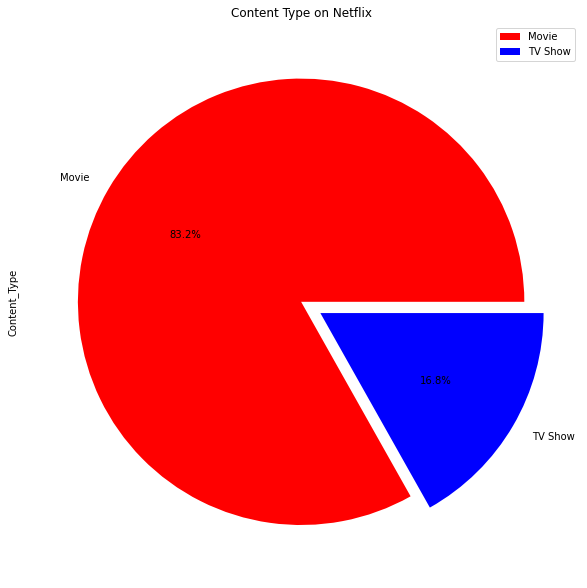

In [96]:
contentType_count = df['Content_Type'].value_counts()
contentType_count.plot(kind='pie', autopct='%1.1f%%', legend=True, explode=(0, 0.1), 
                        title = "Content Type on Netflix", colors=["red", "blue"],
                        figsize=(10,20))

Yearly Distribution of the following Netflix Shows


<AxesSubplot:title={'center':'Follwoing Years with the Corespoundings Netflix Movies and Shows'}>

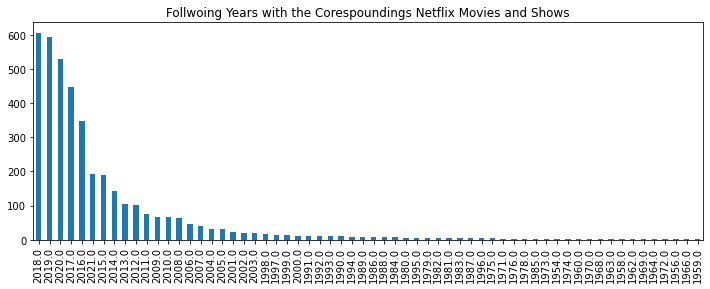

In [97]:
print("Yearly Distribution of the following Netflix Shows")
## SORTING BY ASCENDING ORDER;
year_no_of_shows= df["release_Date"].value_counts().sort_values(ascending=False) 
plt.figure(figsize=(12,4))
year_no_of_shows.plot(title='Follwoing Years with the Corespoundings Netflix Movies and Shows',kind="bar")

  The Following four years presents the most number of relaseses of content {various distinct categorical genres} published/stream by Netflix:
  
- 2019
- 2020
- 2018
- 2017
 
 -**Furthermore , it must be highlighted that there striking noticeable drastic increase in amount of viewership over  the extensive years from early 2000s to present 20200, whereby in recent previous years from 2016 onwards (2017- 640, 2018- 920 , 2019- 940, 2020- 950) has been paradigm shift in relations to amounts of viewship respectively.**

Text(0, 0.5, 'Count of Movie/ TV Show')

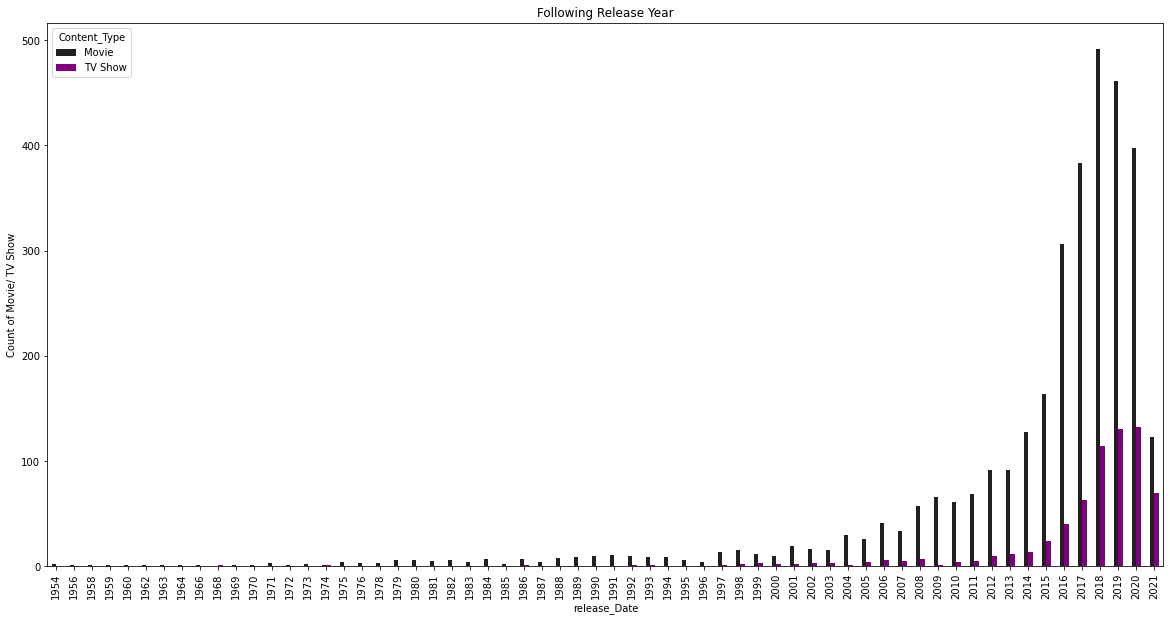

In [98]:
df['release_Date'] = df['release_Date'].round().astype(int)
content_added = df.groupby(["Content_Type","release_Date"])["release_Date"].count().unstack('Content_Type')
content_added = content_added.sort_values(ascending=True, by='release_Date')
content_added.plot(kind='bar',color=["#221f1f","#800080"],figsize=(20, 10), title = "Following Release Year").set_ylabel("Count of Movie/ TV Show")

C:\Users\Ricky Dindial\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


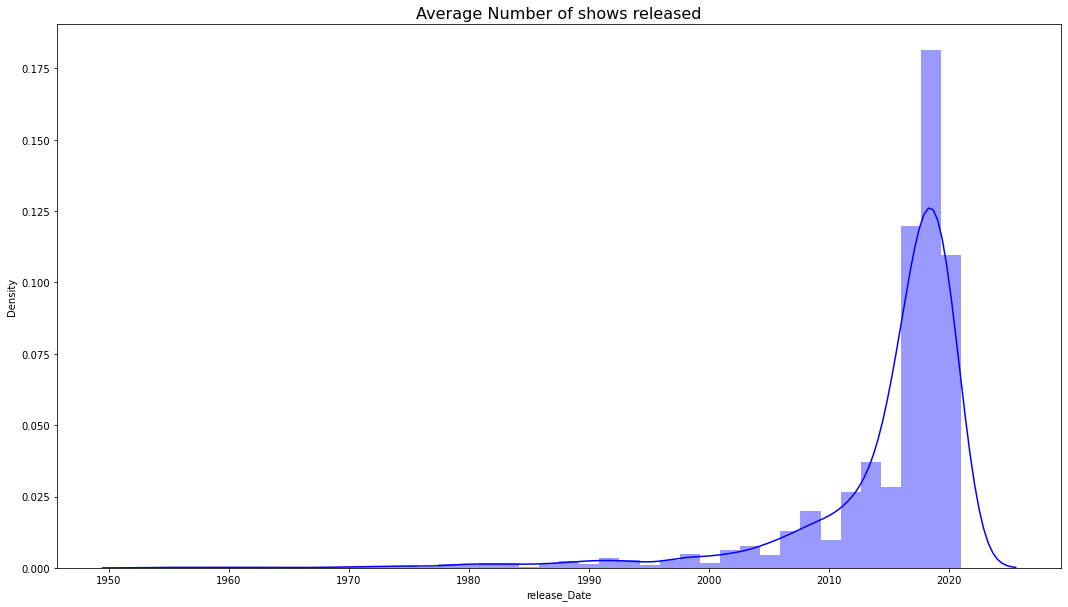

In [99]:
plt.figure(figsize=(18,10))
sns.distplot(df['release_Date'], bins=40, color='#0000FF')
plt.title('Average Number of shows released', fontsize=16)
plt.show()

## Analysing most frequent range of IDMB Scores

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 [Text(0, 0, '9.4/10'),
  Text(1, 0, '9.3/10'),
  Text(2, 0, '9.2/10'),
  Text(3, 0, '9.1/10'),
  Text(4, 0, '9.0/10'),
  Text(5, 0, '8.9/10'),
  Text(6, 0, '8.8/10'),
  Text(7, 0, '8.7/10'),
  Text(8, 0, '8.6/10'),
  Text(9, 0, '8.5/10'),
  Text(10, 0, '8.4/10'),
  Text(11, 0, '8.3/10'),
  Text(12, 0, '8.2/10'),
  Text(13, 0, '8.1/10'),
  Text(14, 0, '8.0/10'),
  Text(15, 0, '7.9/10'),
  Text(16, 0, '7.8/10'),
  Text(17, 0, '7.7/10'),
  Text(18, 0, '7.6/10'),
  Text(19, 0, '7.5/10'),
  Text(20, 0, '7.4/10'),
  Text(21, 0, '7.3/10'),
  Text(22, 0, '7.2/10'),
  Text(23, 0, '7.1/10'),
  Text(24, 0, '7.0/10'),
  Text(25, 0, '6.9/10'),
  Text

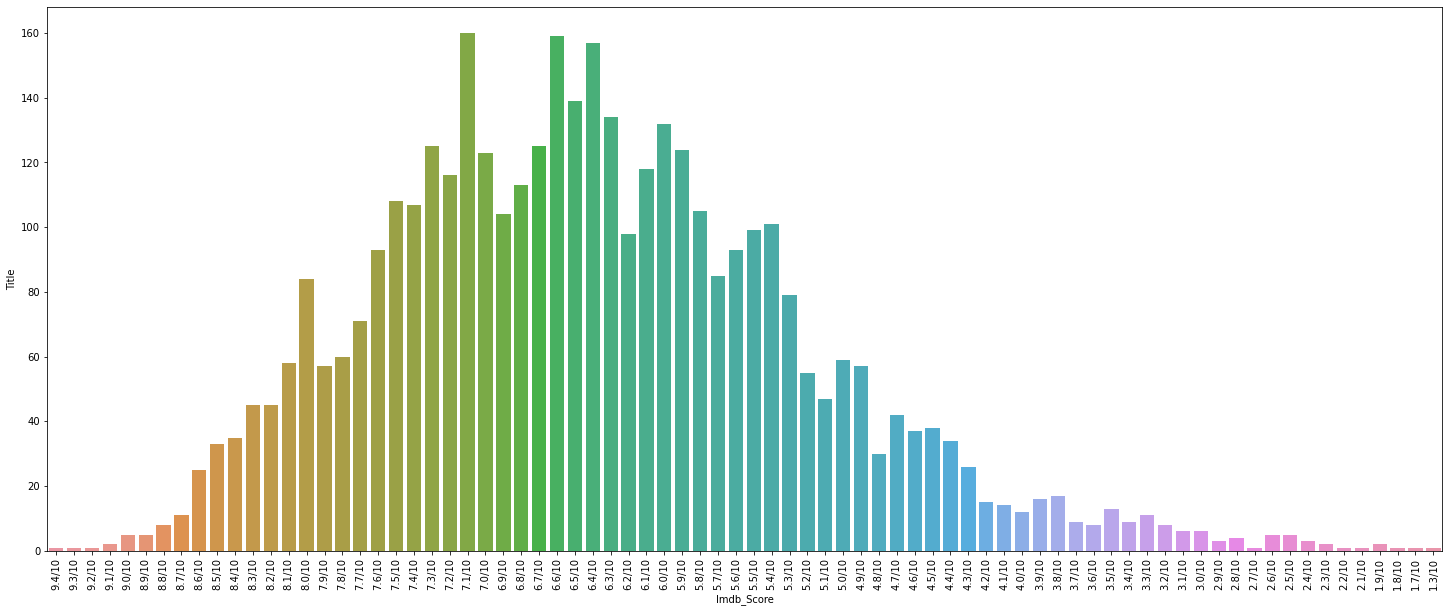

In [103]:
Imdb_Score=df.groupby("Imdb_Score")['Title'].count().reset_index().sort_values(by='Imdb_Score',ascending=False).reset_index(drop=True)
plt.figure(figsize=(25,10))
sns.barplot(x='Imdb_Score',y='Title', data=Imdb_Score)
plt.xticks(rotation=90)

## How is the Rating distribution?

In [28]:
freq_Distr = df['ratings'].value_counts()
print(freq_Distr)

TV-MA    1638
TV-14     983
R         370
TV-PG     295
PG-13     218
PG        118
TV-Y7     117
TV-Y      106
TV-G       83
G          14
NC-17       1
Name: ratings, dtype: int64


**Distribution of the rating for the following TV shows and Movies respectively over the extensive period ( Year release-1950s , 2000s and currently 2020)**

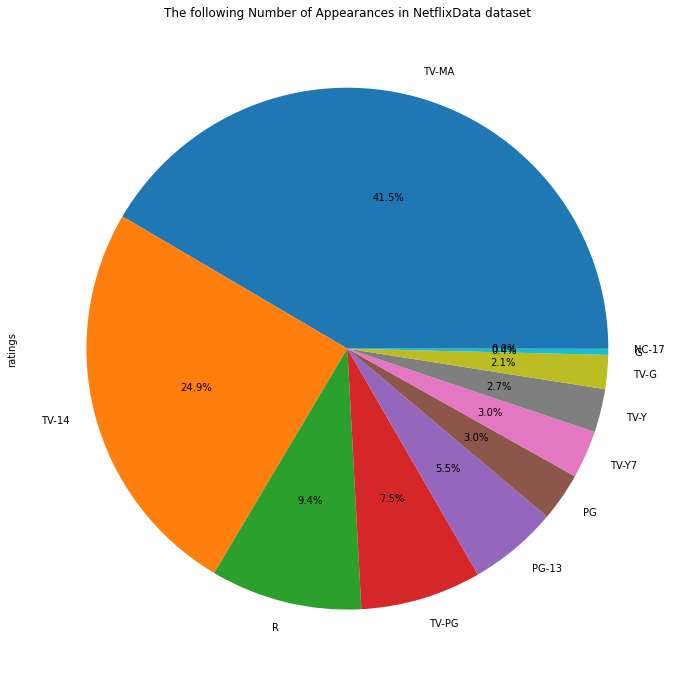

In [29]:
plt.figure(figsize=(12,12))

df.ratings.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('The following Number of Appearances in NetflixData dataset')
plt.show()

The following predomiant 'ratings' in the dataset from our viewers:
 - TV-MA
 - TV-14
 - TV-PG
 - R


<AxesSubplot:xlabel='ratings', ylabel='count'>

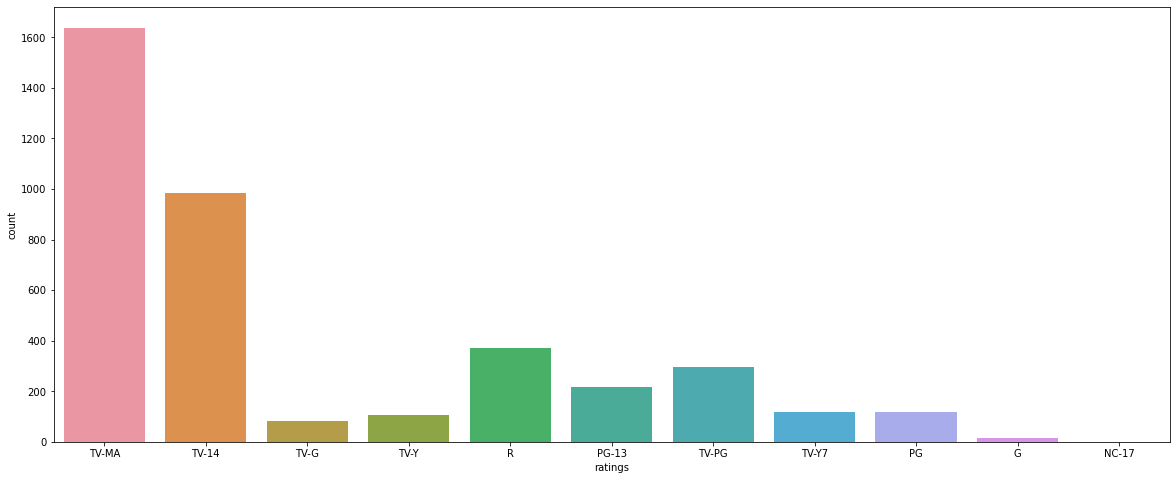

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(x="ratings", data=df)

## Year-wise Ratings

In [31]:
print('The Following  Ratings and their correspounding event occurence in every year:')
df.groupby((['release_Date', 'ratings'])).size()

The Following  Ratings and their correspounding event occurence in every year:


release_Date  ratings
1954          TV-14       1
              TV-G        1
1956          TV-14       1
1958          TV-14       1
1959          TV-14       1
                         ..
2021          TV-G        4
              TV-MA      89
              TV-PG      14
              TV-Y        9
              TV-Y7      11
Length: 289, dtype: int64

## Genres

<AxesSubplot:ylabel='Genres'>

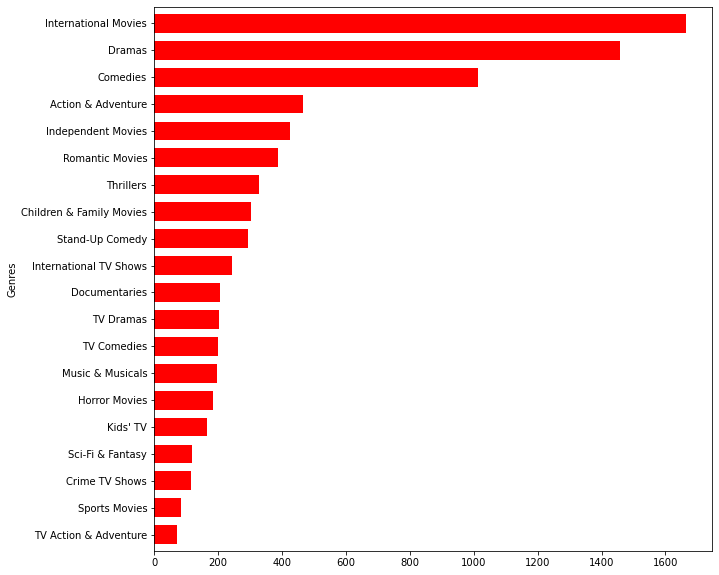

In [32]:
genres = ", ".join(df['Genres']).split(", ")
genres

from collections import Counter
cnt = Counter()
for genre in genres:
    cnt[genre] += 1

topGenres = cnt.most_common(20)
df_topGenres = pd.DataFrame (topGenres, columns = ['Genres','Genres Count'])
df_topGenres.sort_values(ascending=True, by='Genres Count', inplace=True)
df_topGenres.plot.barh(x='Genres',color=["red","blue"],width=0.7,legend=False, figsize=(10, 10))

## Time Series Analysis

**Investigational analysis was undertaken whereby we explored the and ardously foxus on the key elements (various dataype fields:n rekease year, title, Cast, Duraton, Description ).Dynmaically, we instrinsically explored and meticulously explored the following datatype filds that all contributes to the optimization of a suitable recommended distribution o Rating for TV shoes and Movies respectively projecting towards an overall refined reinvigorated entertainment preoduct nationwide .**


Tasks:
1. Source your data
2. Wrangle your data
3. Exploratory Data Analysis
4. Trends and seasonality in time series data
    * Identifying Trends

In [33]:
df.set_index('Date',inplace=True)

In [34]:
df.head(10)

,Show Id,Title,Description,Genres,release_Date,ratings,duration,Imdb_Score,Content_Type,Date_Added,decade
Date,,,,,,,,,,,
2020-09-08,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...","Horror Movies, International Movies, Thrillers",2020,TV-MA,99 min,6.2/10,Movie,NaN,2010s
2020-07-01,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Documentaries, International Movies",2019,TV-14,95 min,6.4/10,Movie,NaN,2010s
2020-05-21,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...","Dramas, International Movies, Romantic Movies",2018,TV-G,102 min,7.0/10,Movie,NaN,2010s
2020-06-28,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,"Dramas, International Movies, Romantic Movies",2020,TV-G,104 min,7.0/10,Movie,NaN,2010s
2017-09-08,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,When nerdy high schooler Dani finally attracts...,Comedies,2017,TV-14,99 min,5.1/10,Movie,NaN,2010s
2021-06-21,6da2fc83-1546-4e9d-bf2e-9b472a059c18,#Selfie,"Two days before their final exams, three teen ...","Comedies, Dramas, International Movies",2014,TV-MA,125 min,5.8/10,Movie,NaN,2010s
2021-06-21,2aa7f08b-0321-4398-baa9-4a138f8cb9e9,#Selfie 69,"After a painful breakup, a trio of party-lovin...","Comedies, Dramas, International Movies",2016,TV-MA,119 min,6.0/10,Movie,NaN,2010s
2019-10-18,ea94d1e2-dfb5-4fb0-b941-ca4b1ade98c1,10 Days in Sun City,After his girlfriend wins the Miss Nigeria pag...,"Comedies, International Movies, Romantic Movies",2017,TV-14,87 min,5.1/10,Movie,NaN,2010s
2017-07-01,eb2818f5-d01b-46fe-8797-931a767d5831,10 jours en or,When a carefree bachelor is unexpectedly left ...,"Comedies, Dramas, International Movies",2012,TV-14,97 min,6.1/10,Movie,NaN,2010s


## Exploratory Data Analysis (EDA)

#### Plotting the data for Imdb Score

In [48]:
df['Imdb_Score'] = df['Imdb_Score'].str.replace(' ', '+').apply(eval)

In [50]:
df['Imdb_Score'] = df['Imdb_Score'] * 10

In [51]:
df.head(10)

,Show Id,Title,Description,Genres,release_Date,ratings,duration,Imdb_Score,Content_Type,Date_Added,decade
Date,,,,,,,,,,,
2020-09-08,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...","Horror Movies, International Movies, Thrillers",2020,TV-MA,99 min,6.2,Movie,NaN,2010s
2020-07-01,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Documentaries, International Movies",2019,TV-14,95 min,6.4,Movie,NaN,2010s
2020-05-21,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...","Dramas, International Movies, Romantic Movies",2018,TV-G,102 min,7.0,Movie,NaN,2010s
2020-06-28,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,"Dramas, International Movies, Romantic Movies",2020,TV-G,104 min,7.0,Movie,NaN,2010s
2017-09-08,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,When nerdy high schooler Dani finally attracts...,Comedies,2017,TV-14,99 min,5.1,Movie,NaN,2010s
2021-06-21,6da2fc83-1546-4e9d-bf2e-9b472a059c18,#Selfie,"Two days before their final exams, three teen ...","Comedies, Dramas, International Movies",2014,TV-MA,125 min,5.8,Movie,NaN,2010s
2021-06-21,2aa7f08b-0321-4398-baa9-4a138f8cb9e9,#Selfie 69,"After a painful breakup, a trio of party-lovin...","Comedies, Dramas, International Movies",2016,TV-MA,119 min,6.0,Movie,NaN,2010s
2019-10-18,ea94d1e2-dfb5-4fb0-b941-ca4b1ade98c1,10 Days in Sun City,After his girlfriend wins the Miss Nigeria pag...,"Comedies, International Movies, Romantic Movies",2017,TV-14,87 min,5.1,Movie,NaN,2010s
2017-07-01,eb2818f5-d01b-46fe-8797-931a767d5831,10 jours en or,When a carefree bachelor is unexpectedly left ...,"Comedies, Dramas, International Movies",2012,TV-14,97 min,6.1,Movie,NaN,2010s


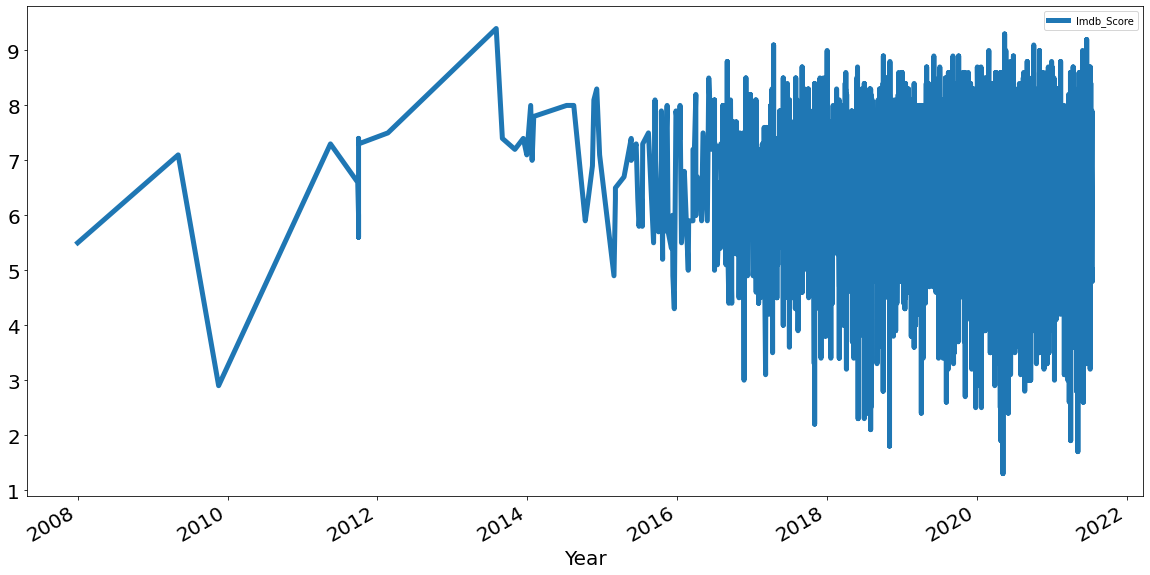

In [52]:
df[['Imdb_Score']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

#### Identifying the Trends using rolling average

Text(0.5, 0, 'Year')

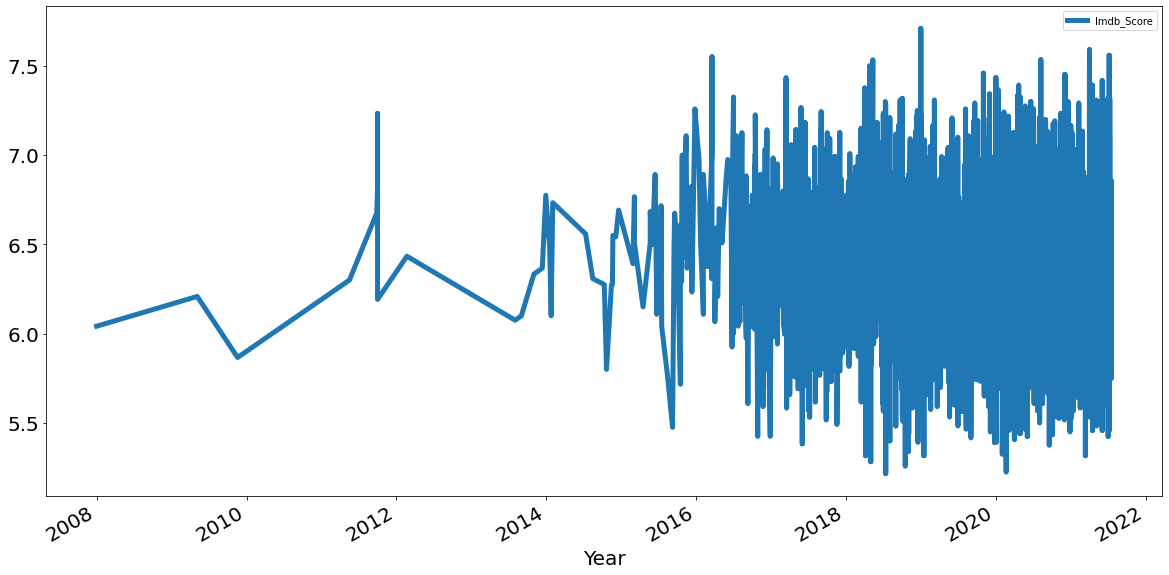

In [58]:
score = df[['Imdb_Score']]
score.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

#### First-order differencing

Text(0.5, 0, 'Year')

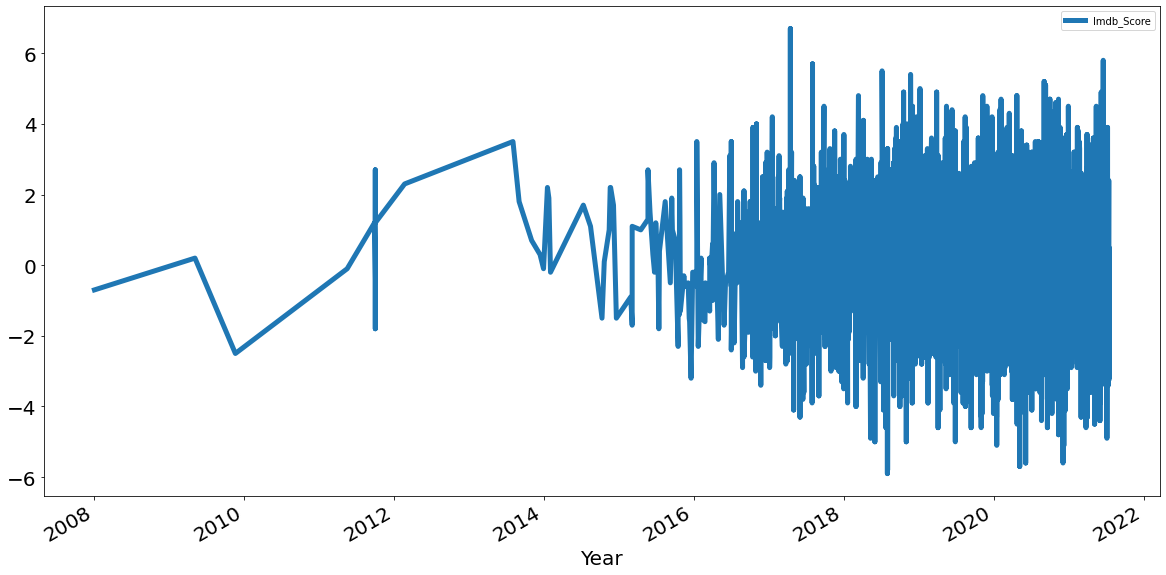

In [59]:
score.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Since much of the trend has been removed, it can be seen that around summer time there is a peak in the ratings of these netflix shows since during these times attract more audience since viewers are mainly at home.